<a href="https://colab.research.google.com/github/Antika20/Pillow-Scatter-Plot/blob/main/DEEP_LEARNING_dengan_TENSERFLOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf # import tenserflow
print(tf.__version__)

2.8.0


**DEEP LEARNING DENGAN TENSERFLOW**

**REGRESI**

In [ ]:
import pandas as pd # Format tabular / semi sturctur
import numpy as np # Array
import matplotlib.pyplot as plt # Visualisasi
import seaborn as sns 
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head() # data awalan

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.describe() # menganalisis data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


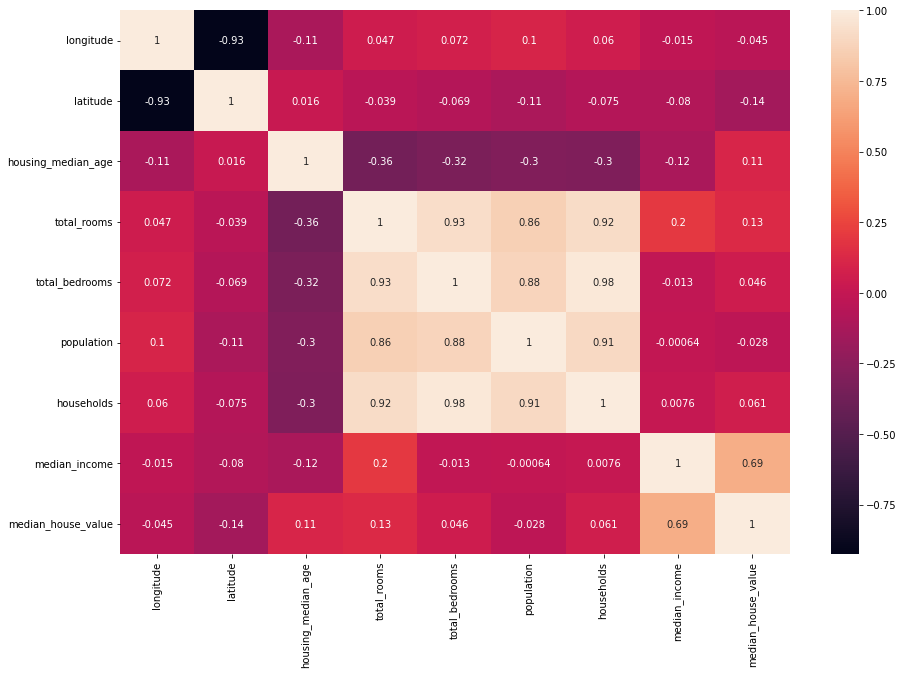

In [ ]:
# mengambil fitur fitur penting  -> korelasi
# Nilai semakin tinggi merah, nilai semakin rendah Biru
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True) # -> nilai prediksi / korelasi


In [ ]:
# memisahkan antara freature dan label 
x = df.drop('median_house_value',axis =1)
y = df[['median_house_value']]

print(x.shape)
print(y.shape)

(17000, 8)
(17000, 1)


In [ ]:
# sklearn -> untuk memisahkan data training dengan data testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2) # ukuran data testing -> 20%

print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

(13600, 8) (13600, 1)
(3400, 8) (3400, 1)


In [ ]:
x.shape # 17-- -> baris , 8 -> itu di indekss 1

(17000, 8)

In [ ]:
# Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(x.shape[1],activation='relu')) # Input layer
model.add(Dense(200,activation='relu')) # Hidden 1 
model.add(Dense(200, activation = 'relu')) # Hidden 2
model.add(Dense(1)) # Output 

model.compile(optimizer='adam',loss='mae') # ERORR REGRESI  

In [ ]:
# proses training dan dimasukan ke model history
history = model.fit(x_train,y_train,validation_split = 0.2,epochs = 100) 

# epoch -> berapa banyak latihan yang dibelajar
# validation_split = 0.2 -> mengambil sekitar 20% untuk dijadikan sebagai data training 

Epoch 1/100
340/340 [==============================] - 1s 2ms/step - loss: 129130.6953 - val_loss: 111882.6016
Epoch 2/100
340/340 [==============================] - 1s 2ms/step - loss: 99565.7969 - val_loss: 90006.7500
Epoch 3/100
340/340 [==============================] - 1s 2ms/step - loss: 84640.1641 - val_loss: 85943.1250
Epoch 4/100
340/340 [==============================] - 1s 3ms/step - loss: 82608.4062 - val_loss: 84966.3203
Epoch 5/100
340/340 [==============================] - 1s 3ms/step - loss: 81590.3359 - val_loss: 83864.9844
Epoch 6/100
340/340 [==============================] - 1s 3ms/step - loss: 80654.3672 - val_loss: 83172.2031
Epoch 7/100
340/340 [==============================] - 1s 3ms/step - loss: 79906.9375 - val_loss: 82486.0703
Epoch 8/100
340/340 [==============================] - 1s 3ms/step - loss: 79200.6562 - val_loss: 81395.1562
Epoch 9/100
340/340 [==============================] - 1s 3ms/step - loss: 78516.6250 - val_loss: 81694.3906
Epoch 10/100
340/

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 8)                   72        
                                                                 
 dense_1 (Dense)             (32, 200)                 1800      
                                                                 
 dense_2 (Dense)             (32, 200)                 40200     
                                                                 
 dense_3 (Dense)             (32, 1)                   201       
                                                                 
Total params: 42,273
Trainable params: 42,273
Non-trainable params: 0
_________________________________________________________________


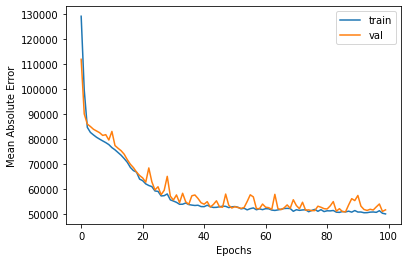

In [ ]:
#plot train loss dari model history
plt.plot (history.history['loss'],label = 'train')
plt.plot (history.history['val_loss'],label='val')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
# Melakukan prediksi 
y_pred = model.predict(x_test)

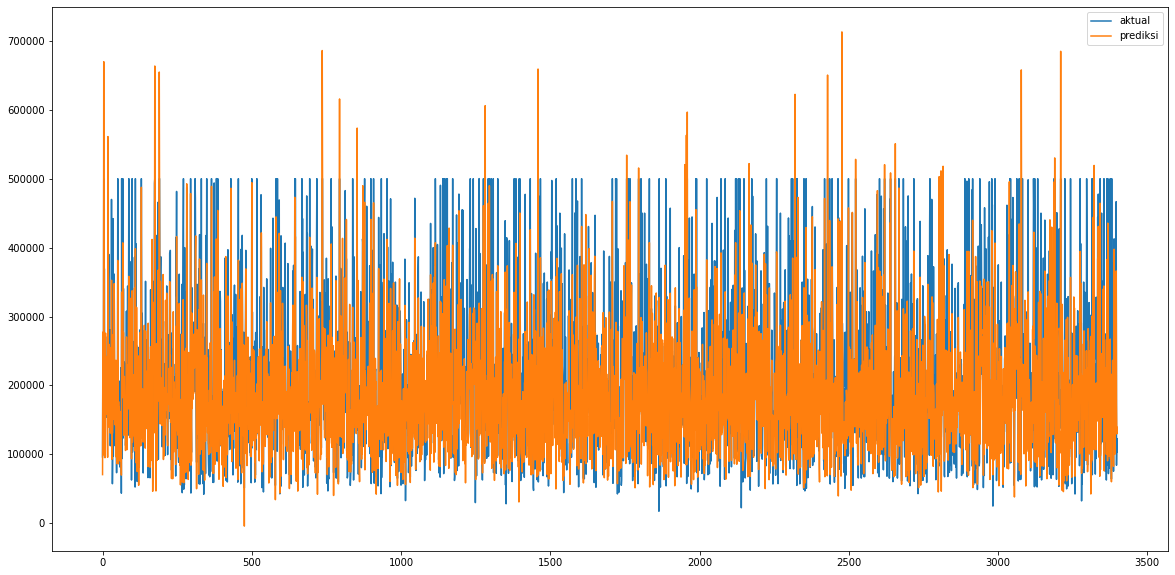

In [ ]:
# Visualisasi
plt.figure(figsize=(20,10))
plt.plot(y_test.values,label = 'aktual')
plt.plot(y_pred,label = 'prediksi')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test.values, y_pred) # Data actual , data prediksi
rmse = mean_squared_error(y_test.values,y_pred,squared =False) #RMSE
mae = mean_absolute_error(y_test.values,y_pred)
mape = mean_absolute_percentage_error(y_test.values,y_pred)
nilai_r = r2_score(y_test.values,y_pred)

print('Nilai Mean Squared Error = {:.2f}'. format(mse)) # 2f -> 2 angka dibelakang koma
print('Nilai Root Squared Error = {:.2f}'. format(rmse))
print('Nilai Mean absolute Error = {:.2f}'. format(mae))
print('Nilai Mean Absolute Percetage Error = {:.2f}'. format(mape))
print('Nilai R2                   ={:.2f} '.format(nilai_r))


Nilai Mean Squared Error = 5032206022.04
Nilai Root Squared Error = 70938.04
Nilai Mean absolute Error = 50621.58
Nilai Mean Absolute Percetage Error = 0.26
Nilai R2                   =0.62 


**KLASIFIKASI dengan DEEP LEARNING**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape",  x_test.shape)
print("x_test shape", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
x_test shape (10000,)


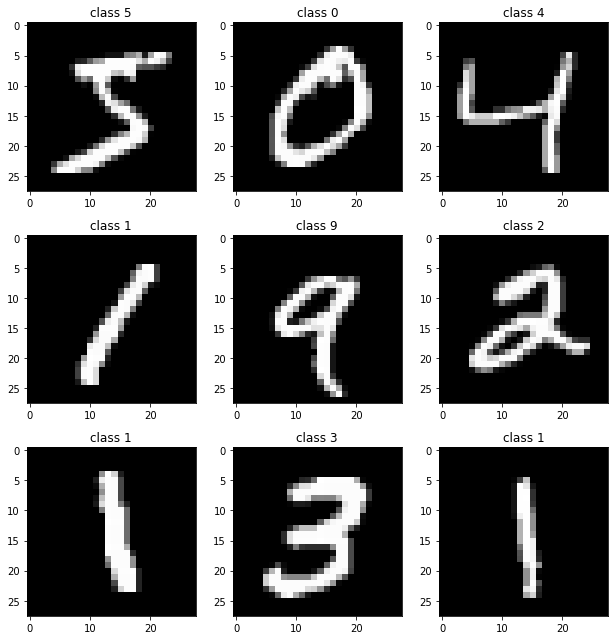

In [ ]:
# Ploting
plt.rcParams['figure.figsize'] =(9,9) # Make the figures a bit bigger 

for i in range(9):
  plt.subplot(3,3, i+1)
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title ('class {}'.format(y_train[i]))

  plt.tight_layout()


In [ ]:
# Data label / angka y 
y_train[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [ ]:
# 28 * 28 
x_train = x_train.reshape(60000, 784) # reshape 60,000 , 28 x 28 matriks into 60,000 784 length vectors
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32') # change integers to 32 bit flot
x_test = x_test.astype('float32')

x_train /= 255 #normalisasi each values for each pixel
x_test /= 255 

print('training matriks shape', x_train.shape)
print('testing matriks shape ', x_test.shape )

training matriks shape (60000, 784)
testing matriks shape  (10000, 784)


In [ ]:
y_train[0]

5

[0,0,0,0,0,1,0,0,0,0]

In [ ]:
from seaborn import categorical
# untuk multiclass -> percetance loss - > percetase 
from keras.utils import np_utils

nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train,nb_classes)

In [ ]:
y_train[:4] # cek 4 data pertama 

array([5, 0, 4, 1], dtype=uint8)

In [ ]:
Y_train [:4]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# Membuat Model dipersingkat 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential ()
model.add(Dense(512,input_shape=(784,),activation ='relu')) # Input layer + Hidden 1
model.add(Dropout(0.2)) # Droput
model.add(Dense(512, activation = 'relu')) # Hidden 2 
model.add(Dropout(0.2)) # DropOut
model.add(Dense(512, activation = 'relu')) # Hidden 3 
model.add(Dropout(0.2)) # DropOut
model.add(Dense(10, activation ='softmax')) # output layer

# 512 adalah neuron dari big layer
# activation softmax - > mengembalikan softmax 


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 10)               

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics =['accuracy']) 
# menghasilkan errorr dan accuracy 

In [ ]:
history = model.fit(x_train,Y_train,validation_split=0.2,batch_size =128, epochs = 5, verbose = 1)

Epoch 1/5
375/375 [==============================] - 7s 18ms/step - loss: 0.2827 - accuracy: 0.9122 - val_loss: 0.1367 - val_accuracy: 0.9583
Epoch 2/5
375/375 [==============================] - 6s 17ms/step - loss: 0.1164 - accuracy: 0.9648 - val_loss: 0.0947 - val_accuracy: 0.9726
Epoch 3/5
375/375 [==============================] - 6s 17ms/step - loss: 0.0835 - accuracy: 0.9741 - val_loss: 0.0884 - val_accuracy: 0.9739
Epoch 4/5
375/375 [==============================] - 7s 18ms/step - loss: 0.0694 - accuracy: 0.9782 - val_loss: 0.0801 - val_accuracy: 0.9775
Epoch 5/5
375/375 [==============================] - 6s 17ms/step - loss: 0.0549 - accuracy: 0.9827 - val_loss: 0.0797 - val_accuracy: 0.9772


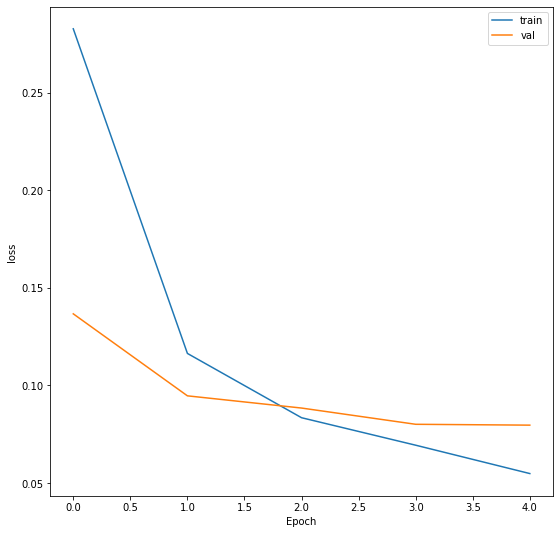

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

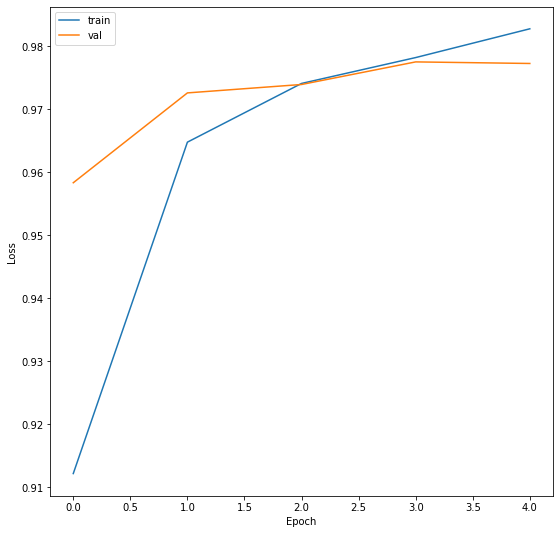

In [ ]:
# Accurracy
plt.plot(history.history['accuracy'],label ='train')
plt.plot(history.history['val_accuracy'],label ='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
predicted = model.predict(x_test)

In [ ]:
predicted[0]

array([9.4909458e-10, 3.2358571e-07, 1.2980487e-06, 8.3206095e-07,
       3.1644046e-10, 9.0085626e-11, 1.2677131e-12, 9.9999619e-01,
       6.7145511e-09, 1.2878122e-06], dtype=float32)

In [ ]:
np.argmax(predicted[0])

7

In [ ]:
y_test[0]

7

In [ ]:
clases_x= np.argmax(predicted,axis=1)

In [ ]:

clases_x[:4]

array([7, 2, 1, 0])

In [ ]:
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [ ]:
# memprediksi performa 
predicted = model.predict(x_test)

In [ ]:
y_train[:4]

array([5, 0, 4, 1], dtype=uint8)

In [ ]:
Y_train[:4]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

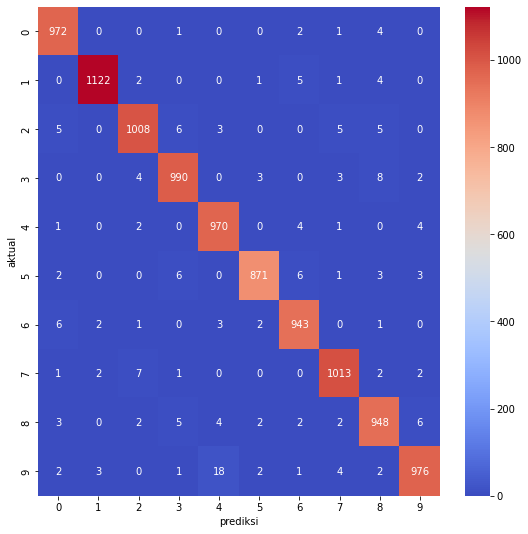

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,clases_x)
sns.heatmap(cm,annot =True,cmap = 'coolwarm',fmt="g")
plt.ylabel ('aktual')
plt.xlabel('prediksi')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,clases_x)) # Keseimbangan setiap Kelas 



              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
correct_indices = np.nonzero(clases_x ==y_test)[0]
incorrect_indices = np.nonzero(clases_x != y_test)[0]

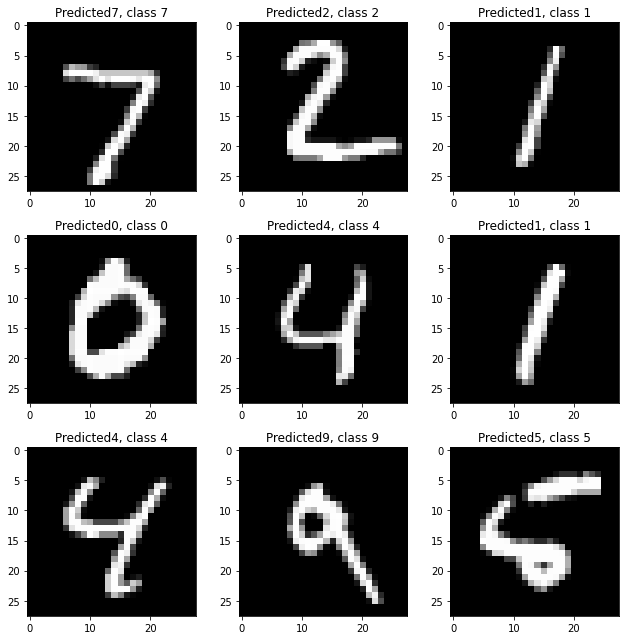

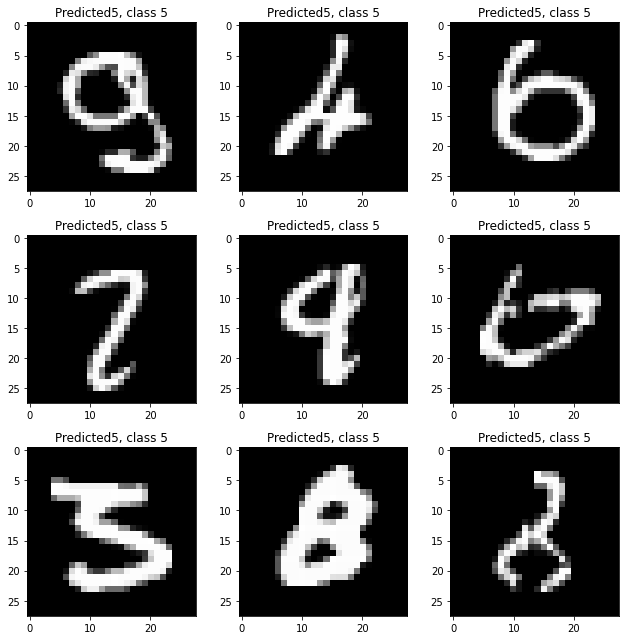

In [ ]:
plt.figure()
for i,correct in enumerate(correct_indices[:9]):  
  plt.subplot(3,3,i+1)
  plt.imshow(x_test[correct].reshape(28,28),cmap ='gray',interpolation='none')
  plt.title('Predicted{}, class {}'.format(clases_x[correct],y_test[correct]))

plt.tight_layout()

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(x_test[incorrect].reshape(28,28),cmap ='gray',interpolation='none')
  plt.title('Predicted{}, class {}'.format(clases_x[correct],y_test[correct]))

plt.tight_layout()


**Convolutional Neural Networks** **-> Khusus Gambar & Video **

Convulasi Image artinya mengecilkan gambar sebelum masuk ke neuron nya tetapi masih menyimpan informasi 

**Kuda VS Manusia **

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# DATA 
!wget -- no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
-o./content/drive/MyDrive/Colab Notebooks/ Data Model CNN TenserFlow/horse-or-human.zip

--2022-04-10 01:15:16--  http://no-check-certificate/
Resolving no-check-certificate (no-check-certificate)... failed: Name or service not known.
wget: unable to resolve host address ‘no-check-certificate’
--2022-04-10 01:15:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.18.128, 142.250.153.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.18.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  57.2MB/s    in 2.5s    

2022-04-10 01:15:19 (57.2 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]

--2022-04-10 01:15:19--  http://-o./content/drive/MyDrive/Colab
Resolving -o. (-o.)... failed: Name or service not known.
wget: unable to resolve host address ‘-o.’
--2022-04-10 01:15:19-

In [ ]:
# Ekstrak Zip
import os 
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

FileNotFoundError: ignored

In [ ]:
# file direktori dengan gambar kuda untuk training
train_horse_dir = os.path.join('./horse-or-human/horses')

# file direktori dengan gambar manusia untuk training 
train_human_dir = os.path.join('./horse-or-human/humans')

In [ ]:
print('total training horses images ',len(os.listdir(train_horse_dir)))

print('total training human images ',len(os.listdir(train_human_dir)))

#listdir -> total gambar


total training horses images  500
total training human images  527


In [ ]:
train_horse_names = os.listdir(train_horse_dir) # Penyimpanan model ke variabel

train_human_names = os.listdir(train_human_dir)

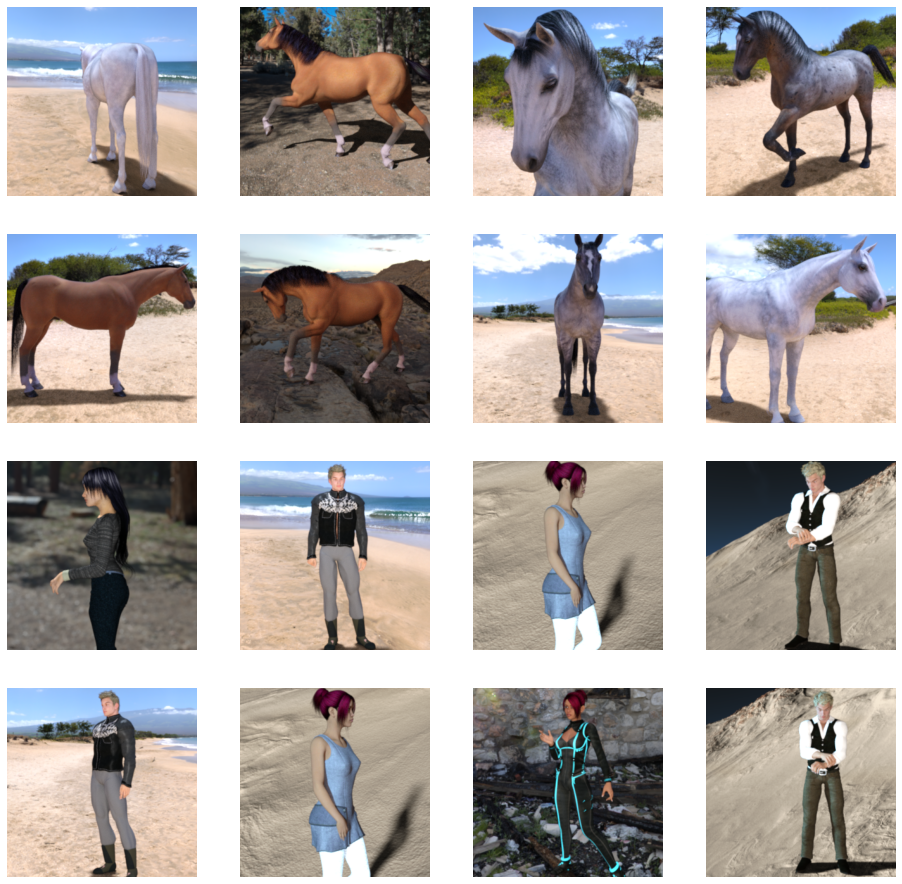

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Kita mau keluarin gambar dengan format 4x4
nrows = 4
ncols = 4

# index untuk iterasi
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()




In [ ]:
#untuk membuat Label -> Y
#ImageGenerator -> mudah mengklasifikasikan 2 gambar dalam 2  folder

from tensorflow.keras.preprocessing.image import ImageDataGenerator 

#resize nilai matriks pada gambar -> Mesinnya
train_datagen = ImageDataGenerator(rescale = 1/255, 
                                   rotation_range = 20,
                                   horizontal_flip= True, # bisa model ke kiri dan kanan  
                                   shear_range = 0.2,
                                   validation_split = 0.2)

train_generator = train_datagen.flow_from_directory(  # akan menampilkan dari directory 
    './horse-or-human',  # sumber gambar 
    target_size =(300,300),  # resize gambar menjadi 300 x 300 pixel 
    batch_size = 128,  # setiap ngabil data akan mengambil 128 data 
    subset= 'training',
    class_mode = 'binary')  # ini karena 2 class 

val_generator = train_datagen.flow_from_directory( # akan menampilkan dari directory 
    './horse-or-human', # sumber gambar 
    target_size =(300,300), # resize gambar menjadi 300 x 300 pixel 
    batch_size = 128, # setiap ngabil data akan mengambil 128 data 
    subset= 'validation',
    class_mode = 'binary') # ini karena 2 class 

# ini sebelum di augmentasi data -  > membuat data set dapat dilihat dari arah mana aja 

Found 822 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


di CNN ada 2 langkah yaitu Feture learning ( Convulution + Pooling untuk memperkecil gambar dijadiin 1 dimensi  ) dan Classification

In [ ]:
 # Membuat Model 
 # Cara 1 -> Membuat model kosong lalu tambahkan 
 # cara 2 -> membuat model seklaigus 
import tensorflow as tf

model = tf.keras.models.Sequential([ # singkat nya ->  model = sequential 
   #note the input shape is the deisred size of the image 300 x 300 with 3 bytes color 

   # This is the first convultion
tf.keras.layers.Conv2D(16,(3,3), activation ='relu', input_shape =(300,300,3)), # jumlah filter nya cnn ada 16, ukuran 3x3 , input shape = gambarnya 
tf.keras.layers.MaxPooling2D(2,2), # hasil convulusi , sixe gambar - size filter + 1 = 300 -3 +1 = 298 

   #the second convulution
tf.keras.layers.Conv2D(32,(3,3), activation ='relu'),
tf.keras.layers.MaxPooling2D(2,2),# akan mengambul nilai terbesar setiap 2x2  -> hasil max pooling = hasil convo / 2

  # the third convulution
tf.keras.layers.Conv2D(64,(3,3), activation ='relu'),
tf.keras.layers.MaxPooling2D(2,2),

# the Fourth convulution
tf.keras.layers.Conv2D(32,(3,3), activation ='relu'),
tf.keras.layers.MaxPooling2D(2,2),


# the Fitfh convulution
tf.keras.layers.Conv2D(512,(3,3), activation ='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#flatten the result to feed into a CNN -> ngubah menjadi 1 dimensi 
tf.keras.layers.Flatten(),

# 512 Masukkan ke hidden layer 
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.2),


# 512 Masukkan ke hidden layer 
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.2),

# Hanya 1 output neuron, itu akan menjadi binary 0 atau 1 dimana 0 adalah kuda dan 1 adalah manusia 
tf.keras.layers.Dense(1, activation='sigmoid') # sigmoid outnya o dan 1 

])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 64)      

In [ ]:
model.compile(loss= 'binary_crossentropy',
               optimizer ='adam',
               metrics =['accuracy'])

In [ ]:
class Callback(tf.keras.callbacks.Callback): # batasan epochs
  def on_epoch_end(self, epoch, logs={}):
   if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
    self.model.stop_training = True

stopTraining = Callback()

In [ ]:
history = model.fit(
      train_generator,
      validation_data=val_generator, 
      callbacks=[stopTraining],
      epochs=100)

Epoch 1/100
7/7 [==============================] - 80s 11s/step - loss: 0.8090 - accuracy: 0.6326 - val_loss: 0.6357 - val_accuracy: 0.5171
Epoch 2/100
7/7 [==============================] - 75s 10s/step - loss: 0.5257 - accuracy: 0.7299 - val_loss: 0.2415 - val_accuracy: 0.8976
Epoch 3/100
7/7 [==============================] - 75s 10s/step - loss: 0.3261 - accuracy: 0.8650 - val_loss: 0.1419 - val_accuracy: 0.9659
Epoch 4/100
7/7 [==============================] - 71s 10s/step - loss: 0.1970 - accuracy: 0.9221 - val_loss: 0.1471 - val_accuracy: 0.9415


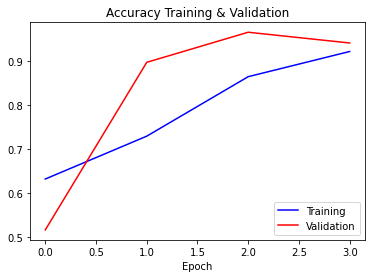

In [ ]:
plt.plot(history.history['accuracy'], label='Training', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation', color='red')
plt.title('Accuracy Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

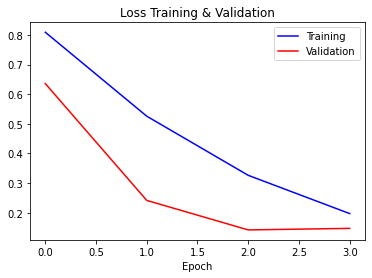

In [ ]:
plt.plot(history.history['loss'], label='Training', color='blue')
plt.plot(history.history['val_loss'], label='Validation', color='red')
plt.title('Loss Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()


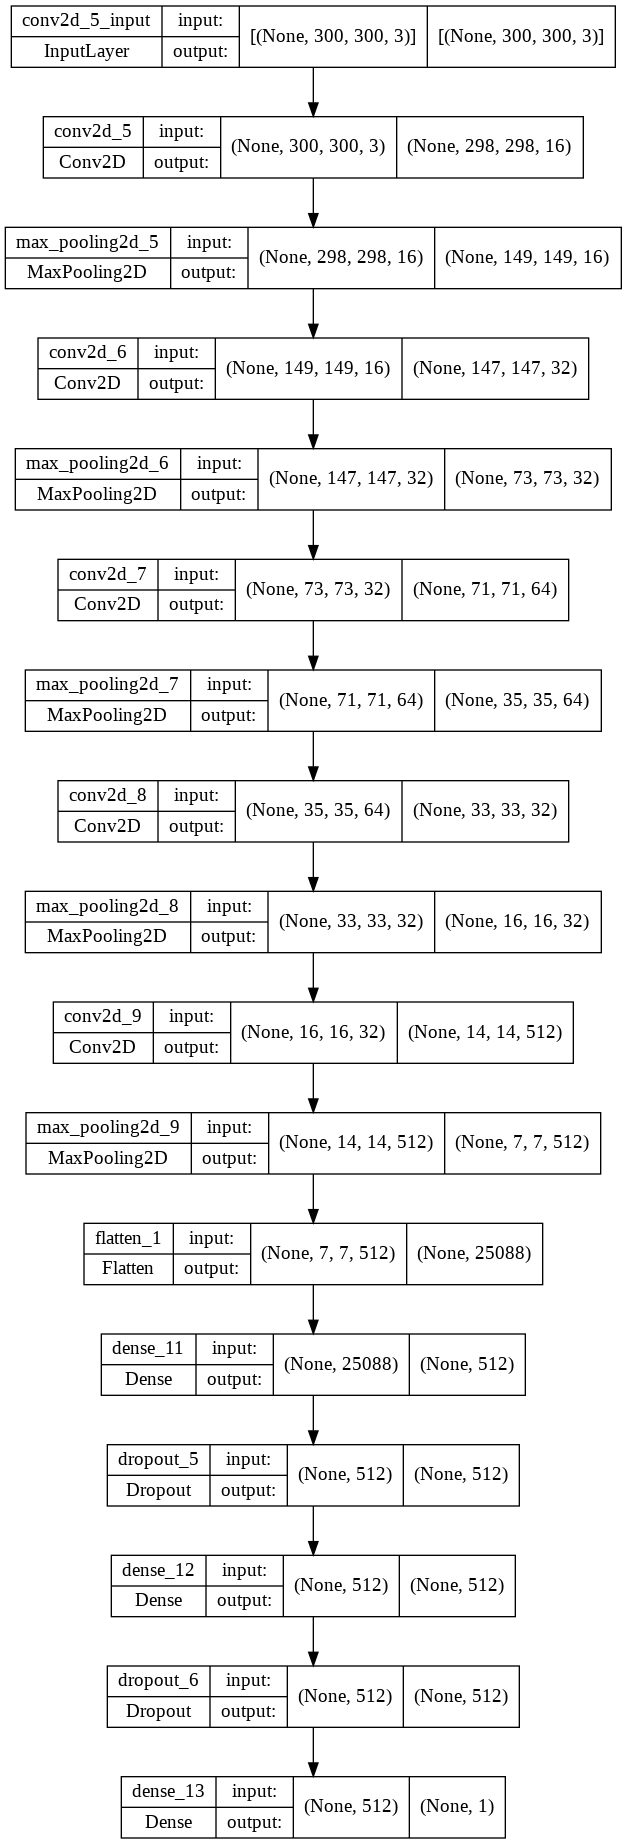

In [ ]:
# mencetak gambarnya
tf.keras.utils.plot_model(
    model, to_file='model.png',show_shapes=True)

Saving human2.png to human2 (1).png


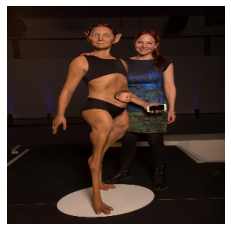

[1.]
human2.png is a human


In [ ]:
# melakukan prediksi
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  plt.axis('Off')
  plt.imshow(img)
  plt.show()
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")